In [27]:
#libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
data=pd.read_csv('salary__Data.csv')

In [29]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [38]:
data.shape

(30, 2)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


In [69]:
class LinearRegression:
    def __init__(self):
        self.n=0#numerator for calculating slope
        self.d=0#denominator for calculating slope
        self.m=0#slope
        self.b=0#intercept
        
    def fit(self,X_data,y_data):
        #mean of x_data & y_data
        X_mean=np.mean(X_data)
        y_mean=np.mean(y_data)
        
        n=len(X_data)
        
        for i in range(n):
            self.n +=(X_data[i]-X_mean)*(y_data[i]-y_mean)
            self.d +=(X_data[i]-X_mean)**2
            
        self.m+=self.n/self.d
        self.b+=y_mean-(self.m*X_mean)
        
        return self
    
    #predict fuction will help in predicting the value of y in accordance with x
    def predict(self,X_data):
        return self.m*X_data+self.b

In [70]:
X=np.array(data.iloc[:,0].values)#X is the feature
y=np.array(data.iloc[:,1].values)#y is the target

In [71]:
#splitting the data into two parts training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [72]:
regressor=LinearRegression()

In [73]:
regressor.fit(X_train,y_train)

In [74]:
#predicting the output
y_pred=regressor.predict(X_test)
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

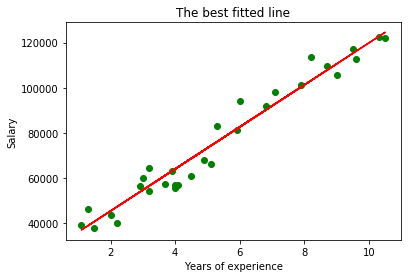

In [78]:
#Best Fit Line
plt.scatter(X,y,color="green")
plt.plot(X_train,regressor.predict(X_train),color="red")
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.title("The best fitted line")
plt.show()

In [79]:
#R2_score(accuracy of model)
from sklearn.metrics import r2_score

In [84]:
accuracy=r2_score(y_test,y_pred)*100

In [85]:
print('the accuracy of the model is:',accuracy)

the accuracy of the model is: 98.8169515729126
